In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
mnist = keras.datasets.mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

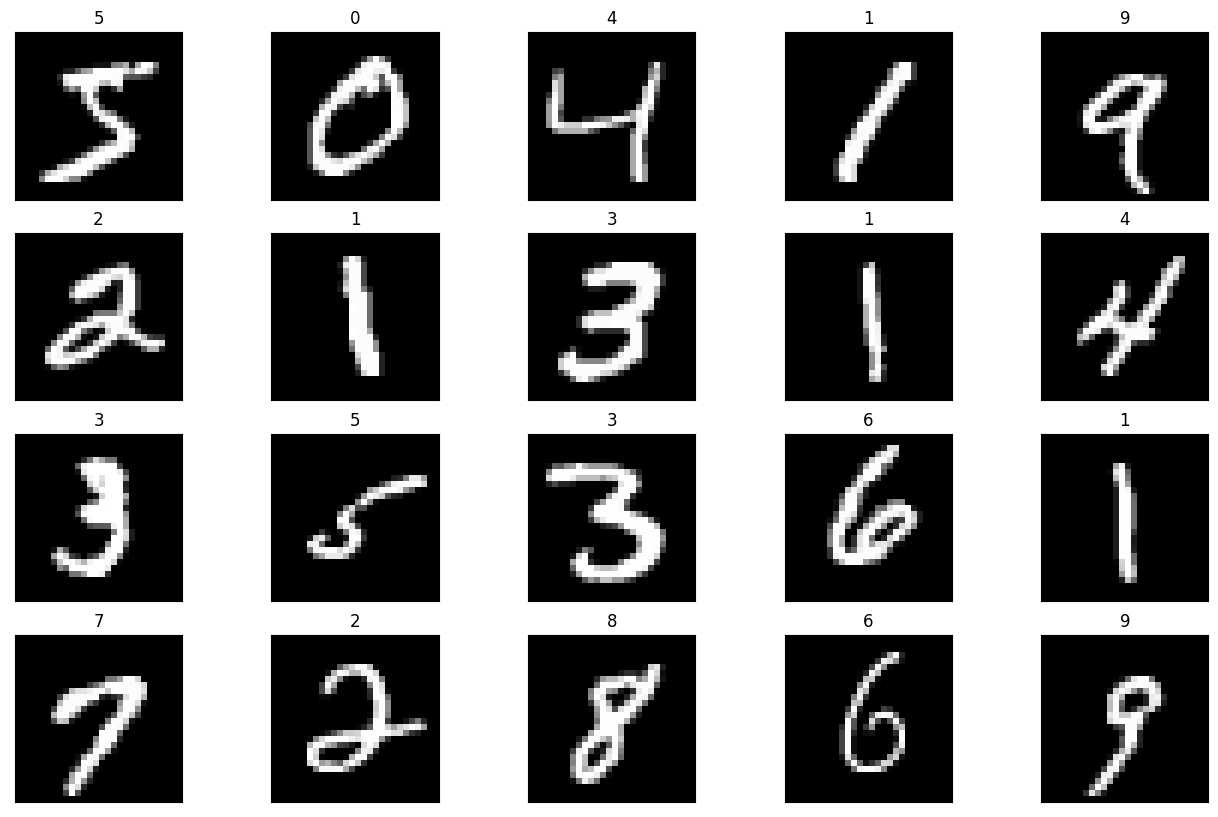

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.title(y_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap='gray')
    

In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_train=X_train/255
X_test=X_test/255

In [8]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 61s 31ms/step - loss: 0.1549 - accuracy: 0.9550 - val_loss: 0.0584 - val_accuracy: 0.9802
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0528 - accuracy: 0.9834 - val_loss: 0.0486 - val_accuracy: 0.9838
Epoch 3/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0335 - accuracy: 0.9901 - val_loss: 0.0414 - val_accuracy: 0.9852
Epoch 4/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0246 - accuracy: 0.9918 - val_loss: 0.0459 - val_accuracy: 0.9857
Epoch 5/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0156 - accuracy: 0.9952 - val_loss: 0.0451 - val_accuracy: 0.9870
Epoch 6/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0115 - accuracy: 0.9960 - val_loss: 0.0560 - val_accuracy: 0.9845
Epoch 7/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0096 - accuracy: 0.9968 - val_loss: 0.0452 -

In [11]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.0465 - accuracy: 0.9881


[0.04650857672095299, 0.988099992275238]

In [12]:
import numpy as np
predicted = model.predict(X_test)

313/313 [==============================] - 4s 10ms/step


In [ ]:
predicted_labels = [np.argmax(i) for i in predicted]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test ,predictions=predicted_labels)

In [ ]:
plt.figure(figsize=(16,10))
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')